In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager as fm, rc
# Path to the uploaded font file
font_path = 'BMYEONSUNG_otf.otf'

# Add the font to Matplotlib's font manager
fm.fontManager.addfont(font_path)

# Set the font as the default for all text in Matplotlib
font_prop = fm.FontProperties(fname=font_path)
rc('font', family=font_prop.get_name())

data = pd.read_csv('지역별_소비타입_연령_성별.csv')
data.head()

# 'userType' 필드가 '제주도민'인 행을 삭제
# '내국인관광객'데이터만 필요
data = data[data['userType'] != '제주도민']

# sido 컬럼 드랍
data = data.drop(["sido"], axis=1, inplace=False)

# 'sigungu'와 'cityGubun' 열을 합치는 코드
data['combined_region'] = data['sigungu'] + ' ' + data['cityGubun']

# 컬럼 순서 정렬
# 'combined_region' 열을 추출하고 데이터 프레임에서 제거
combined_region_column = data.pop('combined_region')
# 'combined_region' 열을 첫 번째 열로 삽입
data.insert(0, 'combined_region', combined_region_column)

# 필요없는 컬럼 드랍
data = data.drop(["sigungu"], axis=1, inplace=False)
data = data.drop(["cityGubun"], axis=1, inplace=False)


,sido,sigungu,cityGubun,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,201812,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,201812,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,201812,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,201812,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,201812,77,99,10021600


In [6]:
# 'userType' 필드가 '제주도민'인 행을 삭제
data = data[data['userType'] != '제주도민']
# 결과 확인
data.head()

,sido,sigungu,cityGubun,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost
11,제주도,제주시,읍면,유흥,내국인관광객,60대이상,여,201812,16,21,4474000
12,제주도,제주시,읍면,유흥,내국인관광객,60대이상,남,201812,45,59,8459100
13,제주도,제주시,읍면,유흥,내국인관광객,50대,여,201812,38,47,4403500
14,제주도,제주시,읍면,유흥,내국인관광객,50대,남,201812,136,174,23659532
15,제주도,제주시,읍면,유흥,내국인관광객,40대,여,201812,60,74,5511100


In [8]:
data = data.drop(["sido"], axis=1, inplace=False)
data.head()

,sigungu,cityGubun,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost
11,제주시,읍면,유흥,내국인관광객,60대이상,여,201812,16,21,4474000
12,제주시,읍면,유흥,내국인관광객,60대이상,남,201812,45,59,8459100
13,제주시,읍면,유흥,내국인관광객,50대,여,201812,38,47,4403500
14,제주시,읍면,유흥,내국인관광객,50대,남,201812,136,174,23659532
15,제주시,읍면,유흥,내국인관광객,40대,여,201812,60,74,5511100


In [9]:
# 'sigungu'와 'cityGubun' 열을 합치는 코드
data['combined_region'] = data['sigungu'] + ' ' + data['cityGubun']

# 결과 확인
# data[['sigungu', 'cityGubun', 'combined_region']].head()
data.head()

,sigungu,cityGubun,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost,combined_region
11,제주시,읍면,유흥,내국인관광객,60대이상,여,201812,16,21,4474000,제주시 읍면
12,제주시,읍면,유흥,내국인관광객,60대이상,남,201812,45,59,8459100,제주시 읍면
13,제주시,읍면,유흥,내국인관광객,50대,여,201812,38,47,4403500,제주시 읍면
14,제주시,읍면,유흥,내국인관광객,50대,남,201812,136,174,23659532,제주시 읍면
15,제주시,읍면,유흥,내국인관광객,40대,여,201812,60,74,5511100,제주시 읍면


In [12]:
data = data.drop(["sigungu"], axis=1, inplace=False)
data = data.drop(["cityGubun"], axis=1, inplace=False)
data.head()

,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost,combined_region
11,유흥,내국인관광객,60대이상,여,201812,16,21,4474000,제주시 읍면
12,유흥,내국인관광객,60대이상,남,201812,45,59,8459100,제주시 읍면
13,유흥,내국인관광객,50대,여,201812,38,47,4403500,제주시 읍면
14,유흥,내국인관광객,50대,남,201812,136,174,23659532,제주시 읍면
15,유흥,내국인관광객,40대,여,201812,60,74,5511100,제주시 읍면


In [13]:
# 'combined_region' 열을 추출하고 데이터 프레임에서 제거
combined_region_column = data.pop('combined_region')

# 'combined_region' 열을 첫 번째 열로 삽입
data.insert(0, 'combined_region', combined_region_column)

# 결과 확인
data.head()

,combined_region,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost
11,제주시 읍면,유흥,내국인관광객,60대이상,여,201812,16,21,4474000
12,제주시 읍면,유흥,내국인관광객,60대이상,남,201812,45,59,8459100
13,제주시 읍면,유흥,내국인관광객,50대,여,201812,38,47,4403500
14,제주시 읍면,유흥,내국인관광객,50대,남,201812,136,174,23659532
15,제주시 읍면,유흥,내국인관광객,40대,여,201812,60,74,5511100


In [14]:
# 현재 작업 디렉토리에 CSV 파일로 저장
csv_file_name = '카드소비패턴_수정.csv'

# 데이터 프레임을 CSV 파일로 저장
data.to_csv(csv_file_name, index=False)

In [15]:
data = pd.read_csv('카드소비패턴_수정.csv')
data.head()

,combined_region,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost
0,제주시 읍면,유흥,내국인관광객,60대이상,여,201812,16,21,4474000
1,제주시 읍면,유흥,내국인관광객,60대이상,남,201812,45,59,8459100
2,제주시 읍면,유흥,내국인관광객,50대,여,201812,38,47,4403500
3,제주시 읍면,유흥,내국인관광객,50대,남,201812,136,174,23659532
4,제주시 읍면,유흥,내국인관광객,40대,여,201812,60,74,5511100


In [23]:
import matplotlib

# Check the unique values in 'combined_region'
unique_regions = data['combined_region'].unique()
unique_regions


array(['제주시 읍면', '제주시 도심', '서귀포시 읍면', '서귀포시 도심'], dtype=object)

In [16]:
# 각 컬럼의 카테고리 별로 'userCount', 'useCount', 'useCost'의 합계 계산
grouped_data = data.groupby(['combined_region', 'marketType', 'userType', 'ageGroup', 'gender', 'dtYearMonth'])\
                   .agg({'userCount': 'sum', 'useCount': 'sum', 'useCost': 'sum'}).reset_index()

# 결과 데이터 프레임 확인
grouped_data.head()

,combined_region,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost
0,서귀포시 도심,교통,내국인관광객,20대,남,201801,692,756,29157095
1,서귀포시 도심,교통,내국인관광객,20대,남,201802,722,758,25676338
2,서귀포시 도심,교통,내국인관광객,20대,남,201803,752,806,26269055
3,서귀포시 도심,교통,내국인관광객,20대,남,201804,679,751,23895294
4,서귀포시 도심,교통,내국인관광객,20대,남,201805,637,702,24133996


In [25]:
# 현재 작업 디렉토리에 CSV 파일로 저장
csv_file_name = '카드소비패턴_수정2.csv'

# 데이터 프레임을 CSV 파일로 저장
data.to_csv(csv_file_name, index=False)

In [17]:
# '20대 미만'을 가장 앞으로 오게 재배열
data['ageGroup'] = pd.Categorical(data['ageGroup'], categories=['20대 미만', '20대', '30대', '40대', '50대', '60대 이상'], ordered=True)

# Z-Score 정규화를 위한 컬럼 선택
columns_to_normalize = ['userCount', 'useCount', 'useCost']

# Z-Score 정규화 적용
data[columns_to_normalize] = data[columns_to_normalize].apply(zscore)

# 모든 값을 양수화
data[columns_to_normalize] = data[columns_to_normalize] + 1

# 정규화된 데이터로 막대그래프 그리기를 위한 데이터 melt
data_melted = pd.melt(data, id_vars=['combined_region', 'marketType', 'userType', 'ageGroup', 'gender', 'dtYearMonth'], 
                      value_vars=columns_to_normalize, var_name='Metric', value_name='Normalized Value')

# 카테고리별로 막대그래프 그리기
categories = ['combined_region', 'marketType', 'ageGroup', 'gender', 'dtYearMonth']

plt.figure(figsize=(15, 20))
for i, category in enumerate(categories, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=data_melted, x='Metric', y='Normalized Value', hue=category)
    plt.title(f'Normalized Metrics by {category}')
    plt.xticks(rotation=45)
    plt.tight_layout()

# 모든 그래프 표시
plt.show()



NameError: name 'zscore' is not defined

NameError: name 'sns' is not defined

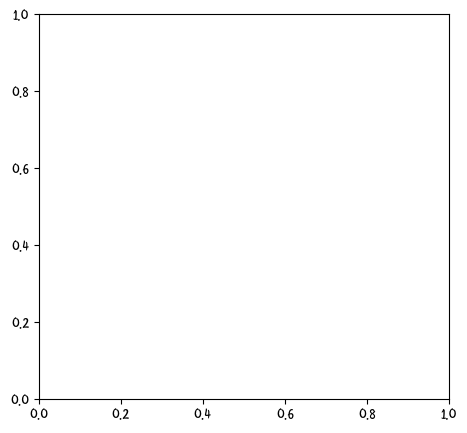

In [18]:
# 그래프 그리기를 위한 서브플롯 설정
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.4)

# 지역별 userCount 그래프
plt.subplot(2, 3, 1)
sns.barplot(data=data, x='combined_region', y='userCount')
plt.title('User Count by Combined Region')
plt.xticks(rotation=45)
plt.xlabel('Combined Region')
plt.ylabel('User Count')

# 연령별 userCount 그래프
plt.subplot(2, 3, 2)
sns.barplot(data=data, x='ageGroup', y='userCount')
plt.title('User Count by Age Group')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('User Count')

# 시장 유형별 userCount 그래프
plt.subplot(2, 3, 3)
sns.barplot(data=data, x='marketType', y='userCount')
plt.title('User Count by Market Type')
plt.xticks(rotation=45)
plt.xlabel('Market Type')
plt.ylabel('User Count')

# 성별 userCount 그래프
plt.subplot(2, 3, 4)
sns.barplot(data=data, x='gender', y='userCount')
plt.title('User Count by Gender')
plt.xlabel('Gender')
plt.ylabel('User Count')

# 월별 userCount 그래프
plt.subplot(2, 3, 5)
sns.barplot(data=data, x='dtYearMonth', y='userCount')
plt.title('User Count by dtYearMonth')
plt.xlabel('dtYearMonth')
plt.ylabel('User Count')

# 모든 그래프 표시
plt.tight_layout()
plt.show()




NameError: name 'sns' is not defined

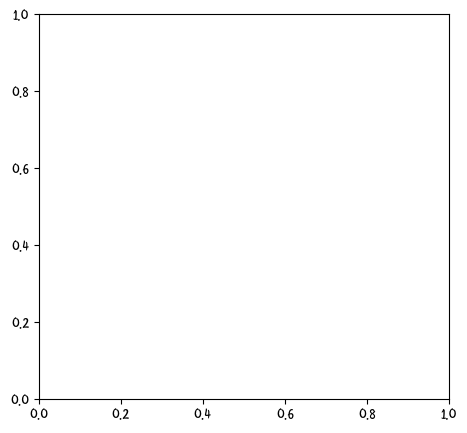

In [ ]:
# 그래프 그리기를 위한 서브플롯 설정
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.4)

# 지역별 userCount 그래프
plt.subplot(2, 3, 1)
sns.barplot(data=data, x='combined_region', y='userCount')
plt.title('User Count by Combined Region')
plt.xticks(rotation=45)
plt.xlabel('Combined Region')
plt.ylabel('User Count')

# 연령별 userCount 그래프
plt.subplot(2, 3, 2)
sns.barplot(data=data, x='ageGroup', y='userCount')
plt.title('User Count by Age Group')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('User Count')

# 시장 유형별 userCount 그래프
plt.subplot(2, 3, 3)
sns.barplot(data=data, x='marketType', y='userCount')
plt.title('User Count by Market Type')
plt.xticks(rotation=45)
plt.xlabel('Market Type')
plt.ylabel('User Count')

# 성별 userCount 그래프
plt.subplot(2, 3, 4)
sns.barplot(data=data, x='gender', y='userCount')
plt.title('User Count by Gender')
plt.xlabel('Gender')
plt.ylabel('User Count')

# 월별 userCount 그래프
plt.subplot(2, 3, 5)
sns.barplot(data=data, x='dtYearMonth', y='userCount')
plt.title('User Count by dtYearMonth')
plt.xlabel('dtYearMonth')
plt.ylabel('User Count')

# 모든 그래프 표시
plt.tight_layout()
plt.show()


